### Model with New Features

#### With our highest R^2 nearing 0.6 and no sign of overfitting, let's add in a few more features in order to improve our model

#### Based off our residual plot in our Model-Main notebook, we notice that the movies we're over and underpredicting have specific genres and rating quality, so let's add those features in.

In [570]:
import pandas as pd
import scipy.stats as stats

In [8]:
add_features = pd.read_csv('model_df.csv')

In [11]:
add_features = add_features.sort_values(by = 'id')

In [198]:
add_features

,Unnamed: 0,id,Title,Domestic_Gross,Foreign_Gross,domestic_opening_gross,rating,foreign_market_count,distributor,director,...,Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG,PG-13
547,547,120667,Fantastic Four,154696080,178839854,56061504,PG-13,65,Twentieth Century Fox,Tim Story,...,1,0,0,0,1,0,0,0,0,1
300,300,120737,The Lord of the Rings: The Fellowship of the Ring,315544750,572390244,47211490,PG-13,65,New Line Cinema,Peter Jackson,...,0,0,0,0,1,0,0,0,0,1
485,485,120912,Men in Black II,193735288,251400000,52148751,PG-13,28,Sony Pictures Entertainment (SPE),Barry Sonnenfeld,...,0,0,0,0,1,0,0,0,0,1
575,575,121765,Star Wars: Episode II - Attack of the Clones,310676740,343103230,80027814,PG,63,Twentieth Century Fox,George Lucas,...,1,0,0,0,1,0,0,0,1,0
499,499,121766,Star Wars: Episode III - Revenge of the Sith,380270577,488119983,108435841,PG-13,67,Twentieth Century Fox,George Lucas,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,584,8079248,Yesterday,73286650,79724048,17010050,PG-13,63,Universal Pictures,Danny Boyle,...,0,1,0,0,0,0,1,0,0,1
211,211,8350360,Annabelle Comes Home,74152591,157100000,20269723,R,43,Warner Bros.,Gary Dauberman,...,0,0,0,1,0,0,0,0,0,0
447,447,8579674,1917,159227644,225561315,576216,R,73,Universal Pictures,Sam Mendes,...,0,1,0,0,0,0,0,0,0,0
689,689,8946378,Knives Out,165363234,143869563,26769548,PG-13,77,Lionsgate,Rian Johnson,...,0,0,0,0,0,0,1,0,0,1


#### Let's start with genres, since we already have that information from our original scrape

We're doing some sratchpad work in another notebook "Data Cleaning and Exploration" then importing the columns back in...

In [14]:
#now that we've sorted this, we should save as csv so we can import in into our other notebook to add in our "animation" column
add_features.to_csv(r'/Users/juliaqiao/Documents/Metis/Project_2/Notebooks/add_features.csv') 

In [17]:
#importing in our dataframe with new genres updated from our scratchpad notebook
updated_features = pd.read_csv('add_features_updated.csv')

We've now added columns for new genres like Animation, Family, Horror, Sci-Fi, Fantasy, and Romance

In [18]:
#looks great!
updated_features

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,Title,Domestic_Gross,Foreign_Gross,domestic_opening_gross,rating,foreign_market_count,...,Comedy,G,PG,PG-13,Is_Animation,Is_Family,Is_Horror,Is_Sci-Fi,Is_Fantasy,Is_Romance
0,0,547,547,120667,Fantastic Four,154696080,178839854,56061504,PG-13,65,...,0,0,0,1,0,0,0,1,1,0
1,1,300,300,120737,The Lord of the Rings: The Fellowship of the Ring,315544750,572390244,47211490,PG-13,65,...,0,0,0,1,0,0,0,0,1,0
2,2,485,485,120912,Men in Black II,193735288,251400000,52148751,PG-13,28,...,0,0,0,1,0,0,0,1,0,0
3,3,575,575,121765,Star Wars: Episode II - Attack of the Clones,310676740,343103230,80027814,PG,63,...,0,0,1,0,0,0,0,1,1,0
4,4,499,499,121766,Star Wars: Episode III - Revenge of the Sith,380270577,488119983,108435841,PG-13,67,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,842,584,584,8079248,Yesterday,73286650,79724048,17010050,PG-13,63,...,1,0,0,1,0,0,0,0,1,1
843,843,211,211,8350360,Annabelle Comes Home,74152591,157100000,20269723,R,43,...,0,0,0,0,0,0,1,0,0,0
844,844,447,447,8579674,1917,159227644,225561315,576216,R,73,...,0,0,0,0,0,0,0,0,0,0
845,845,689,689,8946378,Knives Out,165363234,143869563,26769548,PG-13,77,...,1,0,0,1,0,0,0,0,0,0


In [19]:
updated_features.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'id', 'Title',
       'Domestic_Gross', 'Foreign_Gross', 'domestic_opening_gross', 'rating',
       'foreign_market_count', 'distributor', 'director', 'actor_1', 'actor_2',
       'Years_Since_Release', 'Is_Adaptation', 'Is_Sequel',
       'Sony Pictures Entertainment (SPE)', 'Twentieth Century Fox',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       'Warner Bros.', 'Action', 'Adventure', 'Comedy', 'G', 'PG', 'PG-13',
       'Is_Animation', 'Is_Family', 'Is_Horror', 'Is_Sci-Fi', 'Is_Fantasy',
       'Is_Romance'],
      dtype='object')

In [55]:
updated_features['Years_Since_Release'].value_counts

<bound method IndexOpsMixin.value_counts of 0      15
1      19
2      18
3      18
4      15
       ..
842     1
843     1
844     1
845     1
846     1
Name: Years_Since_Release, Length: 847, dtype: int64>

#### Now let's add in our ratings data from a Kaggle dataset
https://www.kaggle.com/satkarjain/imdb-movie-19722019

In [37]:
#read in our kaggle df of ratings
kaggle_df = pd.read_csv('kaggle_df.csv')

In [38]:
kaggle_df

,Unnamed: 0,Unnamed: 0.1,Title,Year,Rating,Metascore,Votes,Description,Genre,Runtime (Minutes),Revenue (Millions),Actors,Director,Years_Since_Release
0,0,0,Avengers: Endgame,2019,8.5,78.0,648248,After the devastating events of Avengers: ...,"Action, Adventure, Drama",181,858.37,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...","Anthony Russo, Joe Russo",1
1,1,1,Spider-Man: Far from Home,2019,7.6,69.0,255849,Following the events of Avengers: Endgame ...,"Action, Adventure, Sci-Fi",129,388.53,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...",Jon Watts,1
2,2,2,Toy Story 4,2019,7.9,84.0,146740,"When a new toy called ""Forky"" joins Woody ...","Animation, Adventure, Comedy",100,433.03,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale",Josh Cooley,1
3,3,3,Jumanji: The Next Level,2019,7.0,58.0,63856,"In Jumanji: The Next Level, the gang is ba...","Action, Adventure, Comedy",123,0.00,"Dwayne Johnson, Jack Black, Kevin Hart, Karen ...",Jake Kasdan,1
4,4,4,The Lighthouse,2019,7.8,83.0,50595,Two lighthouse keepers try to maintain the...,"Drama, Fantasy, Horror",109,0.43,"Robert Pattinson, Willem Dafoe, Valeriia Karaman",Robert Eggers,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,3783,3234,Chuck & Buck,2000,6.5,76.0,5105,An oddly naive man-child stalks his childh...,"Comedy, Drama",96,1.05,"Mike White, Chris Weitz, Lupe Ontiveros, Beth ...",Miguel Arteta,20
3784,3784,3235,Groove,2000,6.6,54.0,3917,An inside look into one night in the San F...,"Drama, Music",86,1.11,"Chris Ferreira, Mackenzie Firgens, Elizabeth S...",Greg Harrison,20
3785,3785,3236,What's Cooking?,2000,6.9,57.0,2415,"In LA's Fairfax district, where ethnic gro...","Comedy, Drama, Romance",109,1.04,"Joan Chen, Julianna Margulies, Mercedes Ruehl,...",Gurinder Chadha,20
3786,3786,3237,Next Friday,2000,6.1,41.0,34864,Uncle Elroy and Day Day owe money on taxes...,Comedy,98,57.33,"Ice Cube, Mike Epps, Justin Pierce, John Withe...",Steve Carr,20


In [42]:
#narrow down to just the columns we need
kaggle_df = kaggle_df[['Title', 'Years_Since_Release', 'Rating', 'Metascore']]

In [43]:
kaggle_df

,Title,Years_Since_Release,Rating,Metascore
0,Avengers: Endgame,1,8.5,78.0
1,Spider-Man: Far from Home,1,7.6,69.0
2,Toy Story 4,1,7.9,84.0
3,Jumanji: The Next Level,1,7.0,58.0
4,The Lighthouse,1,7.8,83.0
...,...,...,...,...
3783,Chuck & Buck,20,6.5,76.0
3784,Groove,20,6.6,54.0
3785,What's Cooking?,20,6.9,57.0
3786,Next Friday,20,6.1,41.0


In [67]:
combined = updated_features.merge(kaggle_df, on=['Title','Years_Since_Release'], how = 'left')

In [68]:
combined

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,Title,Domestic_Gross,Foreign_Gross,domestic_opening_gross,rating,foreign_market_count,...,PG,PG-13,Is_Animation,Is_Family,Is_Horror,Is_Sci-Fi,Is_Fantasy,Is_Romance,Rating,Metascore
0,0,547,547,120667,Fantastic Four,154696080,178839854,56061504,PG-13,65,...,0,1,0,0,0,1,1,0,5.7,40.0
1,1,300,300,120737,The Lord of the Rings: The Fellowship of the Ring,315544750,572390244,47211490,PG-13,65,...,0,1,0,0,0,0,1,0,NaN,NaN
2,2,485,485,120912,Men in Black II,193735288,251400000,52148751,PG-13,28,...,0,1,0,0,0,1,0,0,6.2,49.0
3,3,575,575,121765,Star Wars: Episode II - Attack of the Clones,310676740,343103230,80027814,PG,63,...,1,0,0,0,0,1,1,0,6.5,54.0
4,4,499,499,121766,Star Wars: Episode III - Revenge of the Sith,380270577,488119983,108435841,PG-13,67,...,0,1,0,0,0,1,1,0,7.5,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,842,584,584,8079248,Yesterday,73286650,79724048,17010050,PG-13,63,...,0,1,0,0,0,0,1,1,NaN,NaN
844,843,211,211,8350360,Annabelle Comes Home,74152591,157100000,20269723,R,43,...,0,0,0,0,1,0,0,0,5.9,53.0
845,844,447,447,8579674,1917,159227644,225561315,576216,R,73,...,0,0,0,0,0,0,0,0,8.6,79.0
846,845,689,689,8946378,Knives Out,165363234,143869563,26769548,PG-13,77,...,0,1,0,0,0,0,0,0,NaN,NaN


In [69]:
#let's do a checks for duplicate titles of different years
#looks great!
combined[combined['Title'] == 'Fantastic Four']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,Title,Domestic_Gross,Foreign_Gross,domestic_opening_gross,rating,foreign_market_count,...,PG,PG-13,Is_Animation,Is_Family,Is_Horror,Is_Sci-Fi,Is_Fantasy,Is_Romance,Rating,Metascore
0,0,547,547,120667,Fantastic Four,154696080,178839854,56061504,PG-13,65,...,0,1,0,0,0,1,1,0,5.7,40.0
516,516,251,251,1502712,Fantastic Four,56117548,111765333,25685737,PG-13,60,...,0,1,0,0,0,1,0,0,4.3,27.0


In [70]:
#let's save this combined dataframe before we begin to clean the columns for modeling
combined.to_csv(r'/Users/juliaqiao/Documents/Metis/Project_2/Notebooks/combined_model_2.csv') 

In [71]:
combined.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'id', 'Title',
       'Domestic_Gross', 'Foreign_Gross', 'domestic_opening_gross', 'rating',
       'foreign_market_count', 'distributor', 'director', 'actor_1', 'actor_2',
       'Years_Since_Release', 'Is_Adaptation', 'Is_Sequel',
       'Sony Pictures Entertainment (SPE)', 'Twentieth Century Fox',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       'Warner Bros.', 'Action', 'Adventure', 'Comedy', 'G', 'PG', 'PG-13',
       'Is_Animation', 'Is_Family', 'Is_Horror', 'Is_Sci-Fi', 'Is_Fantasy',
       'Is_Romance', 'Rating', 'Metascore'],
      dtype='object')

In [72]:
#dropping unneccesary columns for regression
model_2 = combined.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
                                 'Domestic_Gross', 'rating', 
                               'distributor', 'director', 'actor_1', 'actor_2'])

In [101]:
model_2[model_2['Rating'].isnull()].sort_values(by = 'Foreign_Gross')

,id,Title,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,...,PG,PG-13,Is_Animation,Is_Family,Is_Horror,Is_Sci-Fi,Is_Fantasy,Is_Romance,Rating,Metascore
739,3564472,Girls Trip,25380774,31201920,20,3,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
113,329575,Seabiscuit,28058591,20854735,29,17,0,0,0,0,...,0,1,0,0,0,0,0,0,NaN,NaN
390,1091191,Lone Survivor,29707311,90872,45,7,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
89,305669,Bringing Down the House,32013002,31101026,26,17,0,0,0,0,...,0,1,0,0,0,0,0,0,NaN,NaN
479,1398426,Straight Outta Compton,40437206,60200180,40,5,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2109248,Transformers: Age of Extinction,858614996,100038390,55,6,1,1,0,0,...,0,1,0,0,0,1,0,0,NaN,NaN
656,2294629,Frozen,880065368,243390,56,7,1,0,0,0,...,1,0,1,1,0,0,1,0,NaN,NaN
779,4630562,The Fate of the Furious,1009996733,98786705,65,3,0,1,0,0,...,0,1,0,0,0,0,0,0,NaN,NaN
160,369610,Jurassic World,1018130819,208806270,66,5,1,1,0,0,...,0,1,0,0,0,1,0,0,NaN,NaN


#### We're missing a ratings for a fourth of our rows! let's see if we can bring in another dataset from Kaggle

https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset

In [99]:
kaggle_2 = pd.read_csv('IMDb ratings.csv')
kaggle_2.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [100]:
#keep only the columns we need
kaggle_2 = kaggle_2[['imdb_title_id','weighted_average_vote']]

In [107]:
#we need to append our original df's id column before we merge. 
#We lost some learing '0' during the constant dataframe transformations. Let's add those back
model_2 = model_2.sort_values(by = 'id')
model_2

,id,Title,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,...,PG,PG-13,Is_Animation,Is_Family,Is_Horror,Is_Sci-Fi,Is_Fantasy,Is_Romance,Rating,Metascore
0,120667,Fantastic Four,178839854,56061504,65,15,0,0,0,1,...,0,1,0,0,0,1,1,0,5.7,40.0
1,120737,The Lord of the Rings: The Fellowship of the Ring,572390244,47211490,65,19,1,1,0,0,...,0,1,0,0,0,0,1,0,NaN,NaN
2,120912,Men in Black II,251400000,52148751,28,18,0,0,1,0,...,0,1,0,0,0,1,0,0,6.2,49.0
3,121765,Star Wars: Episode II - Attack of the Clones,343103230,80027814,63,18,0,1,0,1,...,1,0,0,0,0,1,1,0,6.5,54.0
4,121766,Star Wars: Episode III - Revenge of the Sith,488119983,108435841,67,15,0,1,0,1,...,0,1,0,0,0,1,1,0,7.5,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,8079248,Yesterday,79724048,17010050,63,1,0,0,0,0,...,0,1,0,0,0,0,1,1,NaN,NaN
844,8350360,Annabelle Comes Home,157100000,20269723,43,1,0,1,0,0,...,0,0,0,0,1,0,0,0,5.9,53.0
845,8579674,1917,225561315,576216,73,1,0,0,0,0,...,0,0,0,0,0,0,0,0,8.6,79.0
846,8946378,Knives Out,143869563,26769548,77,1,0,0,0,0,...,0,1,0,0,0,0,0,0,NaN,NaN


In [116]:
old_id = list(model_2['id'])
new_id = []
for i in old_id:
    i = str(i)
    if len(i) < 7:
        i = 'tt0' +i
        new_id.append(i)
    else:
        i = "tt" +i
        new_id.append(i)

In [121]:
len(new_id)
print(min(new_id),max(new_id))
#great, all the ids look the right length

tt0120667 tt9426210


In [125]:
model_2['imdb_title_id'] = new_id

In [126]:
model_2

,id,Title,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,...,PG-13,Is_Animation,Is_Family,Is_Horror,Is_Sci-Fi,Is_Fantasy,Is_Romance,Rating,Metascore,imdb_title_id
0,120667,Fantastic Four,178839854,56061504,65,15,0,0,0,1,...,1,0,0,0,1,1,0,5.7,40.0,tt0120667
1,120737,The Lord of the Rings: The Fellowship of the Ring,572390244,47211490,65,19,1,1,0,0,...,1,0,0,0,0,1,0,NaN,NaN,tt0120737
2,120912,Men in Black II,251400000,52148751,28,18,0,0,1,0,...,1,0,0,0,1,0,0,6.2,49.0,tt0120912
3,121765,Star Wars: Episode II - Attack of the Clones,343103230,80027814,63,18,0,1,0,1,...,0,0,0,0,1,1,0,6.5,54.0,tt0121765
4,121766,Star Wars: Episode III - Revenge of the Sith,488119983,108435841,67,15,0,1,0,1,...,1,0,0,0,1,1,0,7.5,68.0,tt0121766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,8079248,Yesterday,79724048,17010050,63,1,0,0,0,0,...,1,0,0,0,0,1,1,NaN,NaN,tt8079248
844,8350360,Annabelle Comes Home,157100000,20269723,43,1,0,1,0,0,...,0,0,0,1,0,0,0,5.9,53.0,tt8350360
845,8579674,1917,225561315,576216,73,1,0,0,0,0,...,0,0,0,0,0,0,0,8.6,79.0,tt8579674
846,8946378,Knives Out,143869563,26769548,77,1,0,0,0,0,...,1,0,0,0,0,0,0,NaN,NaN,tt8946378


In [155]:
model_ready = model_2.merge(kaggle_2, on=['imdb_title_id'], how = 'left')

In [156]:
#we don't have many nulls! And out of 3, 2 can be filled in with our original dataset
model_ready[model_ready['weighted_average_vote'].isnull()]

,id,Title,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,...,Is_Animation,Is_Family,Is_Horror,Is_Sci-Fi,Is_Fantasy,Is_Romance,Rating,Metascore,imdb_title_id,weighted_average_vote
146,361596,Fahrenheit 9/11,103252111,23920637,38,16,0,0,0,0,...,0,0,0,0,0,0,7.5,67.0,tt0361596,NaN
396,1116184,Jackass 3D,54456100,50353641,37,10,1,1,0,0,...,0,0,0,0,0,0,NaN,NaN,tt1116184,NaN
504,1477715,This Is It,189092572,23234394,60,11,0,0,1,0,...,0,0,0,0,0,0,7.2,67.0,tt1477715,NaN


In [157]:
#let's fill those in

model_ready.loc[146, 'weighted_average_vote'] = model_ready.loc[146, 'Rating']
model_ready.loc[504, 'weighted_average_vote'] = model_ready.loc[504, 'Rating']

In [158]:
#drop our remaining row of NaN
model_ready.drop(index = 396, inplace = True)

In [179]:
#drop the columns from our original kaggle dataframe that we no longer need, and our old id column
model_ready.drop(columns = ['Rating', 'Metascore', 'id'], inplace = True)


In [180]:
#check again for nulls
model_ready.isnull().sum()

Title                                  0
Foreign_Gross                          0
domestic_opening_gross                 0
foreign_market_count                   0
Years_Since_Release                    0
Is_Adaptation                          0
Is_Sequel                              0
Sony Pictures Entertainment (SPE)      0
Twentieth Century Fox                  0
Universal Pictures                     0
Walt Disney Studios Motion Pictures    0
Warner Bros.                           0
Action                                 0
Adventure                              0
Comedy                                 0
G                                      0
PG                                     0
PG-13                                  0
Is_Animation                           0
Is_Family                              0
Is_Horror                              0
Is_Sci-Fi                              0
Is_Fantasy                             0
Is_Romance                             0
imdb_title_id   

In [199]:
#saving this final dataset to csv
model_ready.to_csv(r'/Users/juliaqiao/Documents/Metis/Project_2/Notebooks/model_ready.csv') 

Our dataset looks great and has all the features we want to add. Finally ready for another round of...

### Regression

In [201]:
# Necessary imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_validate
#from sklearn.model_selection import cross_val_predict

%matplotlib inline

#sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [202]:
X, y = model_ready.drop(['Foreign_Gross', 'Title', 'imdb_title_id'], axis=1), model_ready['Foreign_Gross']
#split all data into X and y (for train+validate) and X and y test
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=7)
#split the train+validate--X and y again into separate train and validate buckets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [203]:
#set up linear regression
lm = LinearRegression()

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
#X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [210]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression TRAIN R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression VAL R^2: {lm.score(X_val, y_val):.3f}')
print(f'Train/Test Score: {lm.score(X_train, y_train)/lm.score(X_val, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression TRAIN R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression VAL R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
print(f'Train/Test Score: {lm_poly.score(X_train_poly, y_train)/lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression TRAIN R^2: 0.626
Linear Regression VAL R^2: 0.746
Train/Test Score: 0.840
Degree 2 polynomial regression TRAIN R^2: 0.689
Degree 2 polynomial regression VAL R^2: 0.728
Train/Test Score: 0.947


#### Much higher R^2 than our initial model! 0.15 bump!
Our Train/Test ratio tells us that we're not overfitted, so there might be more of an opportunity do manipulate our features etc. 

### Feature Manipulation

We have a bunch of features, let's add them in one by one to see if they're necessary, before adding anything else in, like interactions

In [613]:
X, y = model_ready.drop(['Foreign_Gross', 'Title', 'imdb_title_id',
                        #'domestic_opening_gross', #KEY
                         #'foreign_market_count', #keep
                         #'Years_Since_Release', #keep
                         #'Is_Adaptation', 
                         #'Is_Sequel', 
                         'Sony Pictures Entertainment (SPE)',
                         'Twentieth Century Fox', 
                         'Universal Pictures',
                         #'Walt Disney Studios Motion Pictures', #slight
                         #'Warner Bros.', #slight
                         #'Action',
                         #'Adventure', 
                         #'Comedy', 
                         #'G', 
                         'PG', 
                         #'PG-13', #KEEP
                         #'Is_Animation', 
                         'Is_Family',
                         #'Is_Horror', 
                         #'Is_Sci-Fi', 
                         'Is_Fantasy', 
                         #'Is_Romance',
                         #'weighted_average_vote' #KEEP         
                        
                        ], axis=1), model_ready['Foreign_Gross']
#split all data into X and y (for train+validate) and X and y test
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=7)
#split the train+validate--X and y again into separate train and validate buckets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [614]:
#set up linear regression
lm = LinearRegression()

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
#X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [615]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression TRAIN R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression VAL R^2: {lm.score(X_val, y_val):.3f}')
print(f'Train/Test Score: {lm.score(X_train, y_train)/lm.score(X_val, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression TRAIN R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression VAL R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
print(f'Train/Test Score: {lm_poly.score(X_train_poly, y_train)/lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression TRAIN R^2: 0.616
Linear Regression VAL R^2: 0.758
Train/Test Score: 0.813
Degree 2 polynomial regression TRAIN R^2: 0.668
Degree 2 polynomial regression VAL R^2: 0.742
Train/Test Score: 0.900


In [ ]:
#domestic_opening makes up for the large majority of our regression model!
Linear Regression TRAIN R^2: 0.538
Linear Regression VAL R^2: 0.701
Train/Test Score: 0.768
Degree 2 polynomial regression TRAIN R^2: 0.538
Degree 2 polynomial regression VAL R^2: 0.707
Train/Test Score: 0.761

In [512]:
#Let's make a new model now deleting the features we've seen we don't need.
model_final = model_ready.drop(['Sony Pictures Entertainment (SPE)','Twentieth Century Fox', 'Universal Pictures',
                'PG', 'Is_Family','Is_Fantasy'], axis = 1)

### Residuals

We're still a little underfit, so there's room to add in more features. Let's see what our residuals tell us.

In [346]:
X["RES"] = (lm.predict(X)- y)

In [347]:
#sort residuals largest to smallest
X.sort_values(by= 'RES', ascending = False)

,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Universal Pictures,Warner Bros.,Action,Adventure,Comedy,Is_Romance,weighted_average_vote,RES
473,152535747,52,8,1,0,0,0,1,0,0,0,7.2,3.989592e+08
268,158411483,63,12,0,1,0,1,1,0,0,0,9.0,3.219243e+08
300,75204289,65,11,1,1,0,0,1,0,0,0,7.9,3.112898e+08
425,128122480,66,10,0,1,0,0,1,0,0,0,7.0,2.858171e+08
507,70217070,55,8,0,0,1,0,0,1,0,0,6.4,2.521931e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,46629259,55,8,0,1,0,0,0,1,0,0,6.6,-4.016095e+08
631,100038390,55,6,1,1,0,0,1,0,0,0,5.6,-4.111287e+08
700,147187040,68,5,0,1,1,0,1,0,0,0,7.1,-4.542316e+08
779,98786705,65,3,0,1,1,0,1,0,0,0,6.7,-5.027814e+08


Let's look at overpredictions:

In [360]:
model_ready[(model_ready.index == 473) | (model_ready.index == 268) | (model_ready.index == 300) | (model_ready.index == 425) | (model_ready.index == 507)]


,Title,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,...,PG,PG-13,Is_Animation,Is_Family,Is_Horror,Is_Sci-Fi,Is_Fantasy,Is_Romance,imdb_title_id,weighted_average_vote
268,The Dark Knight,470221464,158411483,63,12,0,1,0,0,0,...,0,1,0,0,0,0,0,0,tt0468569,9.0
300,Star Trek,127950427,75204289,65,11,1,1,0,0,0,...,0,1,0,0,0,1,0,0,tt0796366,7.9
425,Iron Man 2,311500000,128122480,66,10,0,1,0,0,0,...,0,1,0,0,0,1,0,0,tt1228705,7.0
473,The Hunger Games,286384032,152535747,52,8,1,0,0,0,0,...,0,1,0,0,0,1,0,0,tt1392170,7.2
507,The Lorax,134809816,70217070,55,8,0,0,0,0,1,...,1,0,1,1,0,0,1,0,tt1482459,6.4


Let's look at underpredictions:

In [361]:
model_ready[(model_ready.index == 700) | (model_ready.index == 779) | (model_ready.index == 292) | (model_ready.index == 561) | (model_ready.index == 631)]


,Title,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,...,PG,PG-13,Is_Animation,Is_Family,Is_Horror,Is_Sci-Fi,Is_Fantasy,Is_Romance,imdb_title_id,weighted_average_vote
292,Avatar,2029931467,77025481,77,11,0,0,0,1,0,...,0,1,0,0,0,1,1,0,tt0499549,7.8
561,Ice Age: Continental Drift,715922939,46629259,55,8,0,1,0,1,0,...,1,0,1,1,0,0,1,0,tt1667889,6.6
631,Transformers: Age of Extinction,858614996,100038390,55,6,1,1,0,0,0,...,0,1,0,0,0,1,0,0,tt2109248,5.6
700,Furious 7,1162041131,147187040,68,5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,tt2820852,7.1
779,The Fate of the Furious,1009996733,98786705,65,3,0,1,0,0,1,...,0,1,0,0,0,0,0,0,tt4630562,6.7


Not much of a connection between the under and overpredicted movies, within their own groups.
The only patterns are that there are a few SciFi but not fantasy movies that are and an animation that is family oriented but not disney overpredicted.


### Adding Interactions Based on Residuals

Based on that intuition, let's create a new Scifi X Fantasy feature, and a Animation X Disney feature.

In [513]:
model_interactions = model_final.copy()

In [514]:
model_interactions['Animation_X_Disney']=model_interactions['Is_Animation']*model_interactions['Walt Disney Studios Motion Pictures']

In [522]:
model_interactions['SciFiX_Fantasy']=model_ready['Is_Sci-Fi']*model_ready['Is_Fantasy']

In [606]:
X, y = model_interactions.drop(['Foreign_Gross', 'Title', 'imdb_title_id'], axis=1), model_ready['Foreign_Gross']
#split all data into X and y (for train+validate) and X and y test
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=3)
#split the train+validate--X and y again into separate train and validate buckets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=7)

In [607]:
#set up linear regression
lm = LinearRegression()

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
#X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [608]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression TRAIN R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression VAL R^2: {lm.score(X_val, y_val):.3f}')
print(f'Train/Test Score: {lm.score(X_train, y_train)/lm.score(X_val, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression TRAIN R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression VAL R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
print(f'Train/Test Score: {lm_poly.score(X_train_poly, y_train)/lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression TRAIN R^2: 0.607
Linear Regression VAL R^2: 0.559
Train/Test Score: 1.086
Degree 2 polynomial regression TRAIN R^2: 0.662
Degree 2 polynomial regression VAL R^2: 0.486
Train/Test Score: 1.362


#### This actually lowered our R^2, so we will stick to the original model

### Interactions based on Previous Model

We have a few variable interactions that did well in our previous model, as well as a few that we noticed from residuals.
Let's add them in:

In [ ]:
#from our first model:
#'dom_X_foreign_market', 
#'dom_X_Sequel', 
#'dom_X_Disney',
#'dom_X_Adventure', 
#'dom_X_Comedy', #KEEP
#'foreign_X_Disney',
#'Years_X_Comedy', 
#'Adaptation_X_Disney', 
#'Sequel_X_Action', #KEEP
#'Sequel_X_Adventure', #KEEP
#'Action_X_PG-13'

In [530]:
last_try = model_final.copy()

In [531]:
last_try

,Title,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG-13,Is_Animation,Is_Horror,Is_Sci-Fi,Is_Romance,imdb_title_id,weighted_average_vote
0,Fantastic Four,178839854,56061504,65,15,0,0,0,0,1,0,0,0,1,0,0,1,0,tt0120667,5.7
1,The Lord of the Rings: The Fellowship of the Ring,572390244,47211490,65,19,1,1,0,0,1,0,0,0,1,0,0,0,0,tt0120737,8.8
2,Men in Black II,251400000,52148751,28,18,0,0,0,0,1,0,0,0,1,0,0,1,0,tt0120912,6.2
3,Star Wars: Episode II - Attack of the Clones,343103230,80027814,63,18,0,1,0,0,1,0,0,0,0,0,0,1,0,tt0121765,6.5
4,Star Wars: Episode III - Revenge of the Sith,488119983,108435841,67,15,0,1,0,0,1,0,0,0,1,0,0,1,0,tt0121766,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,Yesterday,79724048,17010050,63,1,0,0,0,0,0,0,1,0,1,0,0,0,1,tt8079248,6.8
844,Annabelle Comes Home,157100000,20269723,43,1,0,1,0,1,0,0,0,0,0,0,1,0,0,tt8350360,5.9
845,1917,225561315,576216,73,1,0,0,0,0,0,0,0,0,0,0,0,0,0,tt8579674,8.3
846,Knives Out,143869563,26769548,77,1,0,0,0,0,0,0,1,0,1,0,0,0,0,tt8946378,7.9


In [532]:
last_try['dom_X_foreign_market'] = last_try['domestic_opening_gross']*last_try['foreign_market_count']

last_try['dom_X_Sequel']=last_try['domestic_opening_gross']*last_try['Is_Sequel']

last_try['dom_X_Disney']=last_try['domestic_opening_gross']*last_try['Walt Disney Studios Motion Pictures']

last_try['dom_X_Adventure']=last_try['domestic_opening_gross']*last_try['Adventure']

last_try['dom_X_Comedy']=last_try['domestic_opening_gross']*last_try['Comedy']

last_try['foreign_X_Disney']=last_try['foreign_market_count']*last_try['Walt Disney Studios Motion Pictures']

last_try['Years_X_Comedy']=last_try['Years_Since_Release']*last_try['Comedy']

last_try['Adaptation_X_Disney']=last_try['Is_Adaptation']*last_try['Walt Disney Studios Motion Pictures']

last_try['Sequel_X_Action']=last_try['Is_Sequel']*last_try['Action']

last_try['Sequel_X_Adventure']=last_try['Is_Sequel']*last_try['Adventure']

last_try['Action_X_PG-13']=last_try['Action']*last_try['PG-13']



In [600]:
X, y = last_try.drop(['Foreign_Gross', 'Title', 'imdb_title_id'], axis=1), last_try['Foreign_Gross']
#split all data into X and y (for train+validate) and X and y test
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=3)
#split the train+validate--X and y again into separate train and validate buckets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=7)

In [601]:
#set up linear regression
lm = LinearRegression()

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
#X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [602]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression TRAIN R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression VAL R^2: {lm.score(X_val, y_val):.3f}')
print(f'Train/Test Score: {lm.score(X_train, y_train)/lm.score(X_val, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression TRAIN R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression VAL R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
print(f'Train/Test Score: {lm_poly.score(X_train_poly, y_train)/lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression TRAIN R^2: 0.621
Linear Regression VAL R^2: 0.599
Train/Test Score: 1.036
Degree 2 polynomial regression TRAIN R^2: 0.676
Degree 2 polynomial regression VAL R^2: 0.302
Train/Test Score: 2.242


#### Our R^2 went up a little more! 
Looks great and we're not at risk of being overfit! This is the most we can do this week, so we'll stop here and move onto graphing out results.

We will also be sticking to the linear model--not the degree 2 poly transformation, as our validation R^2 is much higher for the linear model, and the degree 2 poly transformation looks overfit.

Our train/test score still indicates we have outliers in our training set, but as we've explored in a previous dataset, these outliers are the surpise hits like Avatar, etc. which need to be included in this model because I am predicting blockbuster movies.


#### Let's run out final model on our test set

In [603]:
#fit on full training data
#test on test set

lm.fit(X, y)
print(f'Linear Regression TRAIN R^2: {lm.score(X, y):.3f}')
print(f'Linear Regression TEST R^2: {lm.score(X_test, y_test):.3f}')
print(f'Train/Test Score: {lm.score(X, y)/lm.score(X_test, y_test):.3f}')


Linear Regression TRAIN R^2: 0.626
Linear Regression TEST R^2: 0.687
Train/Test Score: 0.912


### Plotting Residuals

In [604]:
Y_pred = lm.predict(X_test)
Res = lm.predict(X_test) - y_test

In [619]:
#what's the MAE?
from sklearn.metrics import r2_score,mean_absolute_error as mae, mean_squared_error as rmse
print(mae(y_test, Y_pred))
print(rmse(y_test, Y_pred))

181719924.20186156
6.720304900462749e+16


In [621]:
np.average(y_test)

216333297.68823528

In [622]:
np.average(y_test)/mae(y_test, Y_pred)

1.1904764908878338

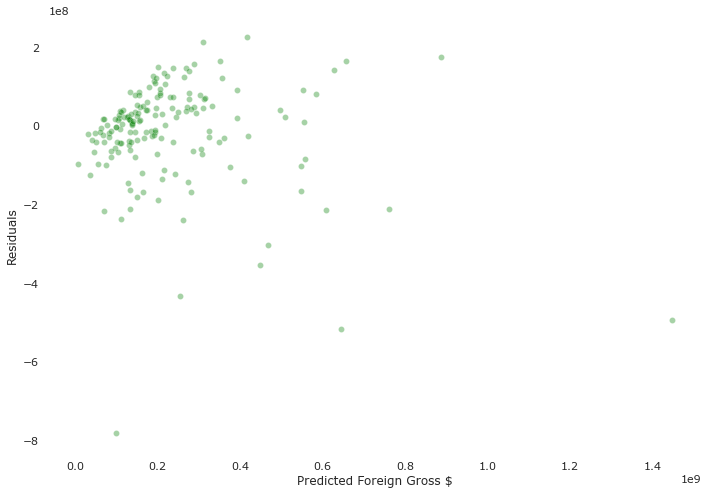

In [618]:
# Plotting our residuals
sns.set(style="white", font = 'verdana')

f, ax = plt.subplots(figsize=(10, 7))

sns.scatterplot(x=Y_pred , y= Res, alpha=0.35, color = 'green')

axes[0].set_title("Residuals vs. Predictions")

plt.tight_layout()

ax.set(ylabel="Residuals", xlabel="Predicted Foreign Gross $")
sns.despine(left=True, bottom=True, right = True);

plt.savefig('Residuals_null_model.png', dpi=300)

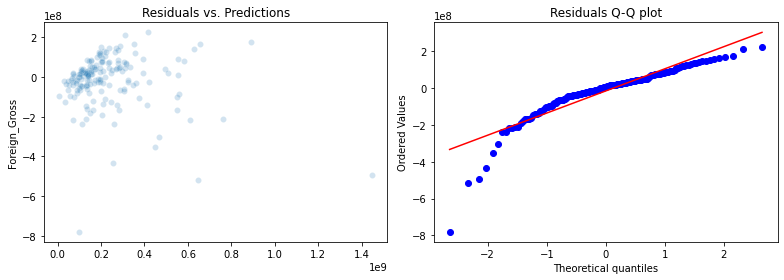

In [605]:
# Plotting our residuals
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

sns.scatterplot(x=Y_pred , y= Res, alpha=0.2, ax=axes[0])
stats.probplot(Res, dist="norm", plot=axes[1])

axes[0].set_title("Residuals vs. Predictions")
axes[1].set_title("Residuals Q-Q plot")

plt.tight_layout()

#### Reverting to our original model

Our residuals don't look healthy here--outliers are impacting it heavily, and our test R^2 is actually lower than the final test R^2 of the original model, so back to notebook: Model-Main

In [609]:
X_test["Test Residuals"] = Res

In [610]:
titles = last_try['Title']

In [611]:
X_test_residuals = pd.merge(titles,X_test,left_on= titles.index,right_on= X_test.index)

In [612]:
X_test_residuals.sort_values(by = 'Test Residuals' )

,key_0,Title,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Walt Disney Studios Motion Pictures,Warner Bros.,Action,...,G,PG-13,Is_Animation,Is_Horror,Is_Sci-Fi,Is_Romance,weighted_average_vote,Animation_X_Disney,SciFiX_Fantasy,Test Residuals
133,656,Frozen,243390,56,7,1,0,1,0,0,...,0,0,1,0,0,0,7.4,1,0,-7.801231e+08
143,700,Furious 7,147187040,68,5,0,1,0,0,1,...,0,1,0,0,0,0,7.1,0,0,-5.166735e+08
153,767,Avengers: Endgame,357115007,56,1,0,1,1,0,1,...,0,1,0,0,1,0,8.4,0,0,-4.930285e+08
118,572,Bohemian Rhapsody,51061119,51,2,0,0,0,0,0,...,0,1,0,0,0,0,8.0,0,0,-4.324571e+08
89,385,Skyfall,88364714,57,8,1,1,0,0,1,...,0,1,0,0,0,0,7.7,0,0,-3.549765e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,209,Shrek the Third,121629270,67,13,1,1,0,0,0,...,0,0,1,0,0,0,6.1,0,0,1.658121e+08
141,690,Star Trek Beyond,59253211,54,4,1,1,0,0,1,...,0,1,0,0,1,0,7.1,0,0,1.663472e+08
138,681,Star Wars: Episode VIII - The Last Jedi,220009584,52,3,0,1,1,0,1,...,0,1,0,0,1,0,7.0,0,1,1.762569e+08
108,515,Halloween,76221545,63,2,0,1,0,0,0,...,0,0,0,1,0,0,6.6,0,0,2.142449e+08
